In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 
sns.set(rc={"figure.figsize": (20, 8)})
%matplotlib inline

EDA и ресерч-анализ

In [62]:
data = pd.read_csv(r'C:\Users\iseka\Downloads\dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Значения столбцов в dataset:

track_id - ID трека

artists - имена музыкантов, исполняющих трек. Если их несколько, то разделены ";"

album_name - название альбома, в котором появлелся трек

popularity - популярность трека, целое число от 0 до 100

duration_ms - длительность трека в миллисекундах

explicit - обозначает наличие нецензурных выражений или нецензурных тем, булевское значение

danceability - это характеристика, которая описывает пригодность дорожки для танцев на основании таких музыкальных элементов, как темп, стабильность ритма, сила долей и общее постоянство.Композиции со значением 0.0 наименее танцевальные, со значением 1.0 — наиболее танцевальные

energy - "спокойность" треков, число от 0 до 1.0, чем больше значение, тем ближе трек по звучанию к металлу

key - это основная группа звуков, или нот, которые составляют гармоническую основу произведения, целое числоот 0 до 11

loudness - число от -49.531 до 4.532, громкость музыки в децибелах, отрицательные значения означают, что уровень шума ниже порога слышимости человека

mode - обозначает модальность трека, 1 - мажор, 0 - минор, мажор - более бодрая радостная мелодия, минор - спокойная, грустная

speechiness - показывает концентрацию слов в треке, число от 0 до 0,965

acousticness - показывает насколько трек акустический, число от 0 до 0,996

instrumentalness - показывает насколько трек чисто интрументальный, чем меньше в нём пения, тем больше показатель, число от 0 до 1.0

liveness - определяет присутствие аудитории в записи. Более высокие значения свидетельствуют о том, что трек был исполнен вживую, число от 0 до 1.0

valence - отражает позитивность или негативность эмоций, которые передаёт музыкальная композиция. Треки с высокой валентностью звучат более позитивно (весёлые, бодрые, эйфорические), а с низкой валентностью — более негативно (грустные, депрессивные, злые), число от 0 до 0,995

tempo - это скорость воспроизведения, темп музыки, число от 0 до 243,372

time_signature	- указывает, сколько ударов в каждом метре и какая нота представляет один удар (сложные музыкальные тонкости)

track_genre - жанр трека

Удалим ненужные столбцы

In [63]:
data = data.drop(['Unnamed: 0', 'track_id'], axis=1)

Посмотрим, что из себя представляет датафрейм

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [65]:
data.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Найдём, песни, в которых пропущены значения

In [66]:
data[data.isna().any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [67]:
data.size

2166000

Учитывая количество песен, потеря одной никак не повлияет на статистику, поэтому её можно удалить

In [68]:
data.drop(65900, axis=0, inplace=True)

In [69]:
data['duration_ms'] = data['duration_ms'].apply(lambda x: x / 60000) #Переведём время из миллисекунд в минуты
data.rename(columns = {'duration_ms': 'duration_mn'}, inplace=True)

In [70]:
data['explicit'] = data['explicit'].apply(lambda x: int(x)) #переведём булевские значения в числа
data.head()

,artists,album_name,track_name,popularity,duration_mn,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,3.844433,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.493500,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.513767,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.365550,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,3.314217,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [71]:
data.loc[data.popularity ==0].size

304361

In [72]:
data.size

2165981

In [73]:
data1 = data.drop(data[data.popularity==0].index) #для нагрядности графиков, так как песен с нулевой популярностью слишком много

<Axes: xlabel='duration_mn', ylabel='popularity'>

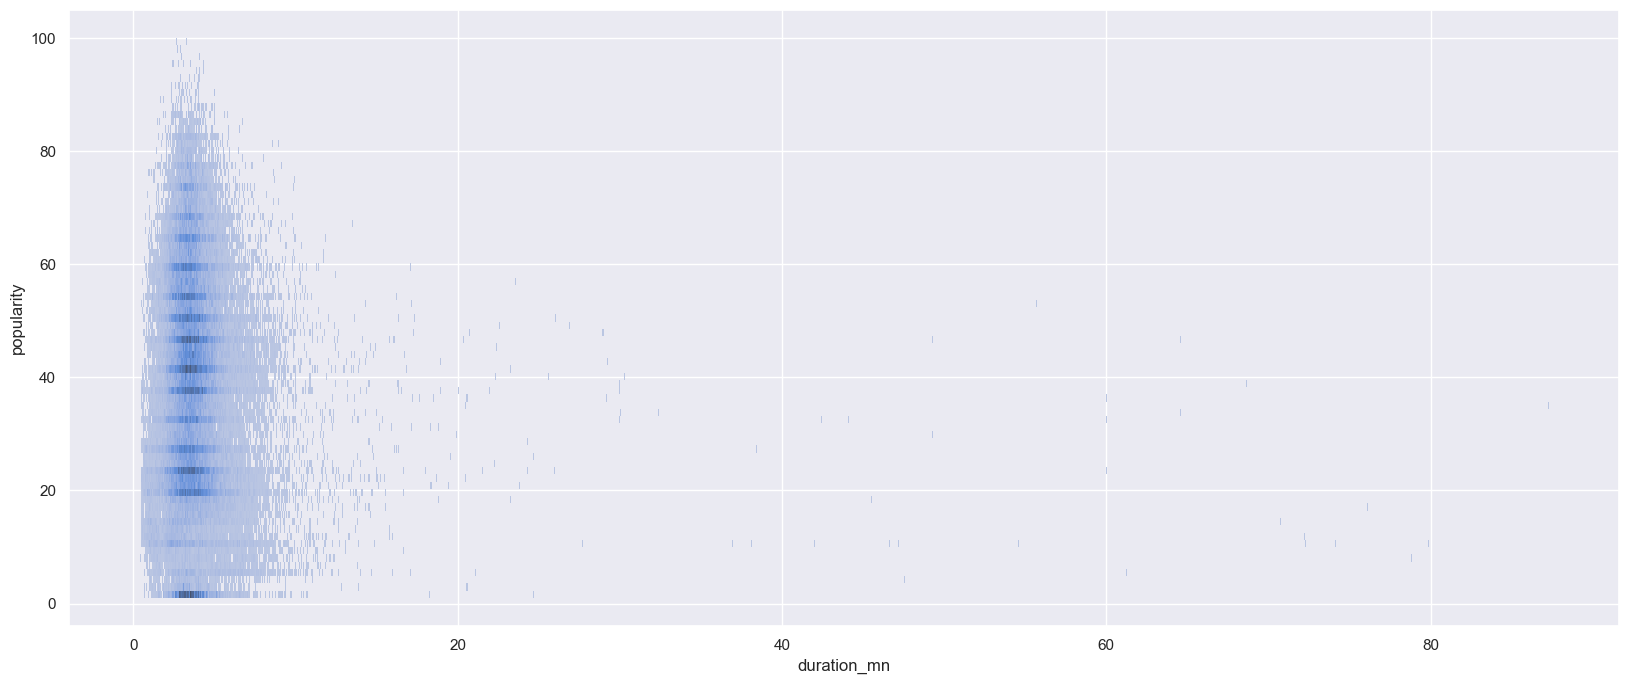

In [74]:
sns.histplot(data1, x='duration_mn', y='popularity')

<Axes: xlabel='explicit', ylabel='popularity'>

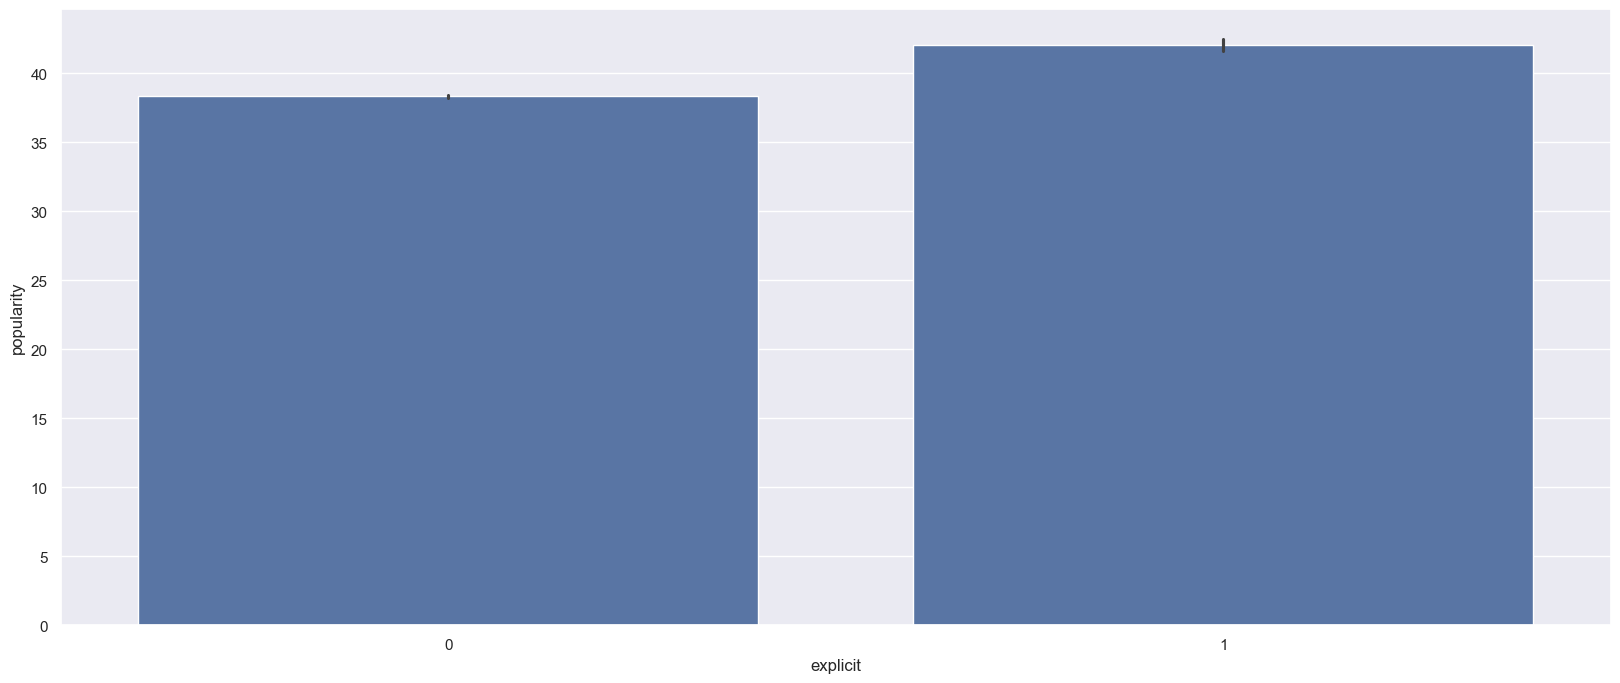

In [75]:
sns.barplot(data1, x='explicit', y='popularity')

<Axes: xlabel='danceability', ylabel='popularity'>

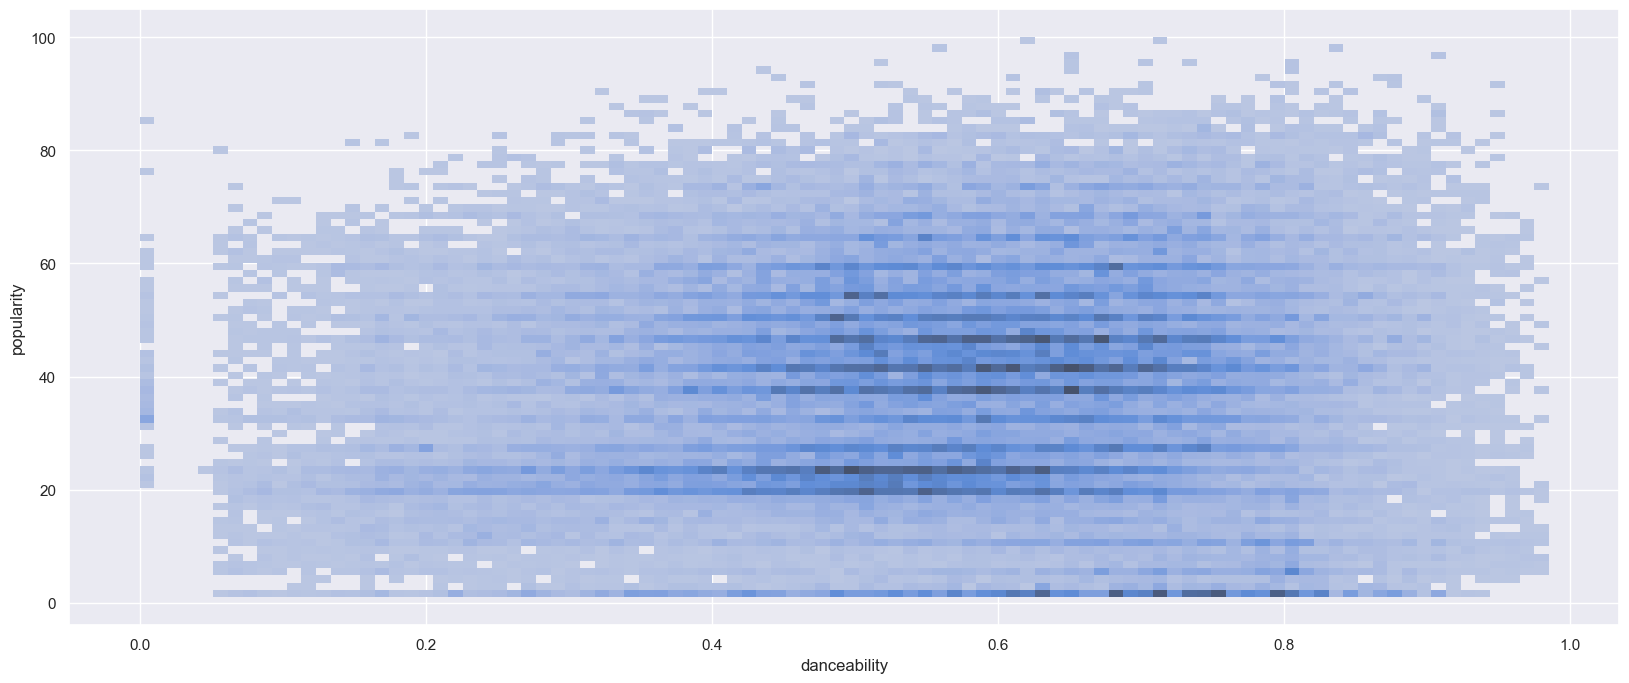

In [76]:
sns.histplot(data1, x='danceability', y='popularity')

<Axes: xlabel='energy', ylabel='popularity'>

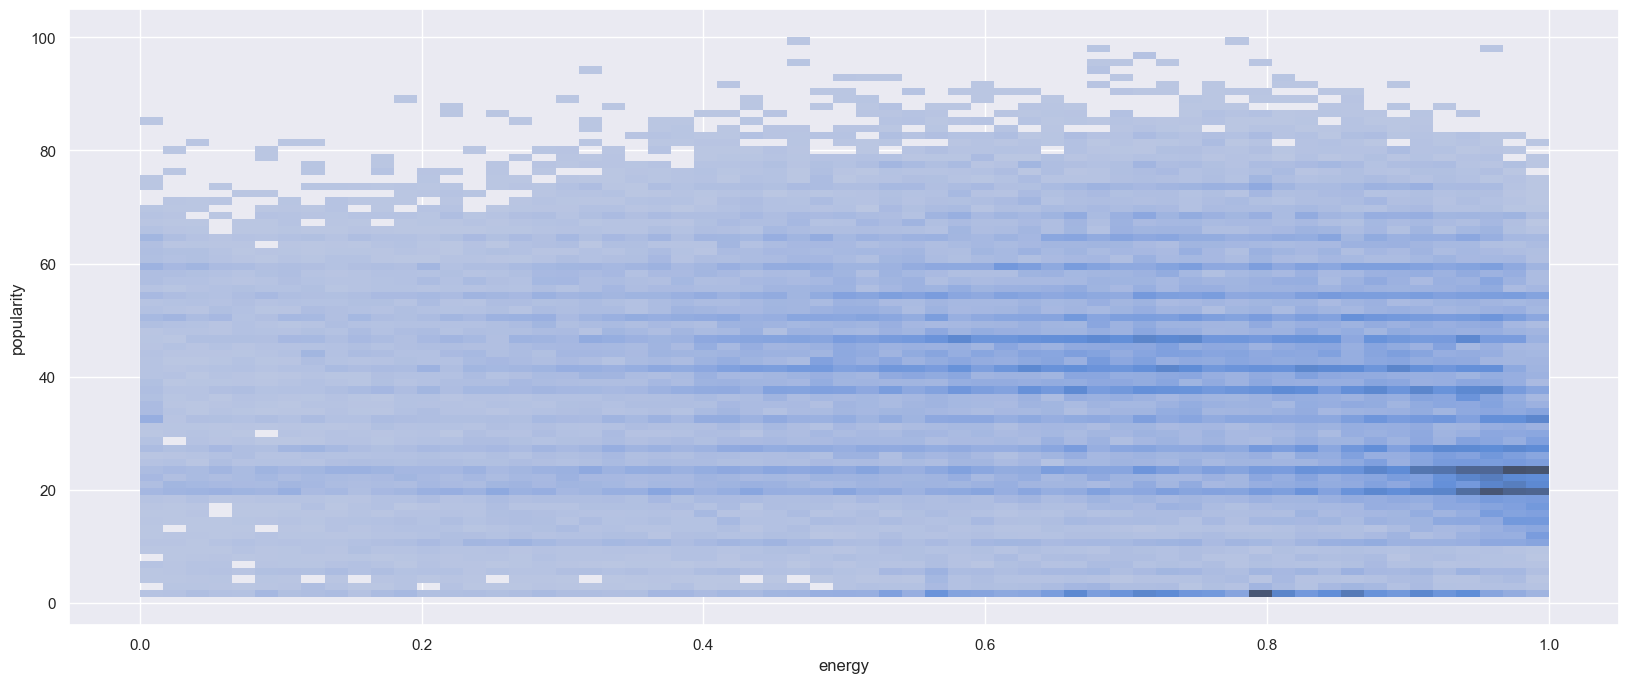

In [77]:
sns.histplot(data1, x='energy', y='popularity')

<Axes: xlabel='key', ylabel='popularity'>

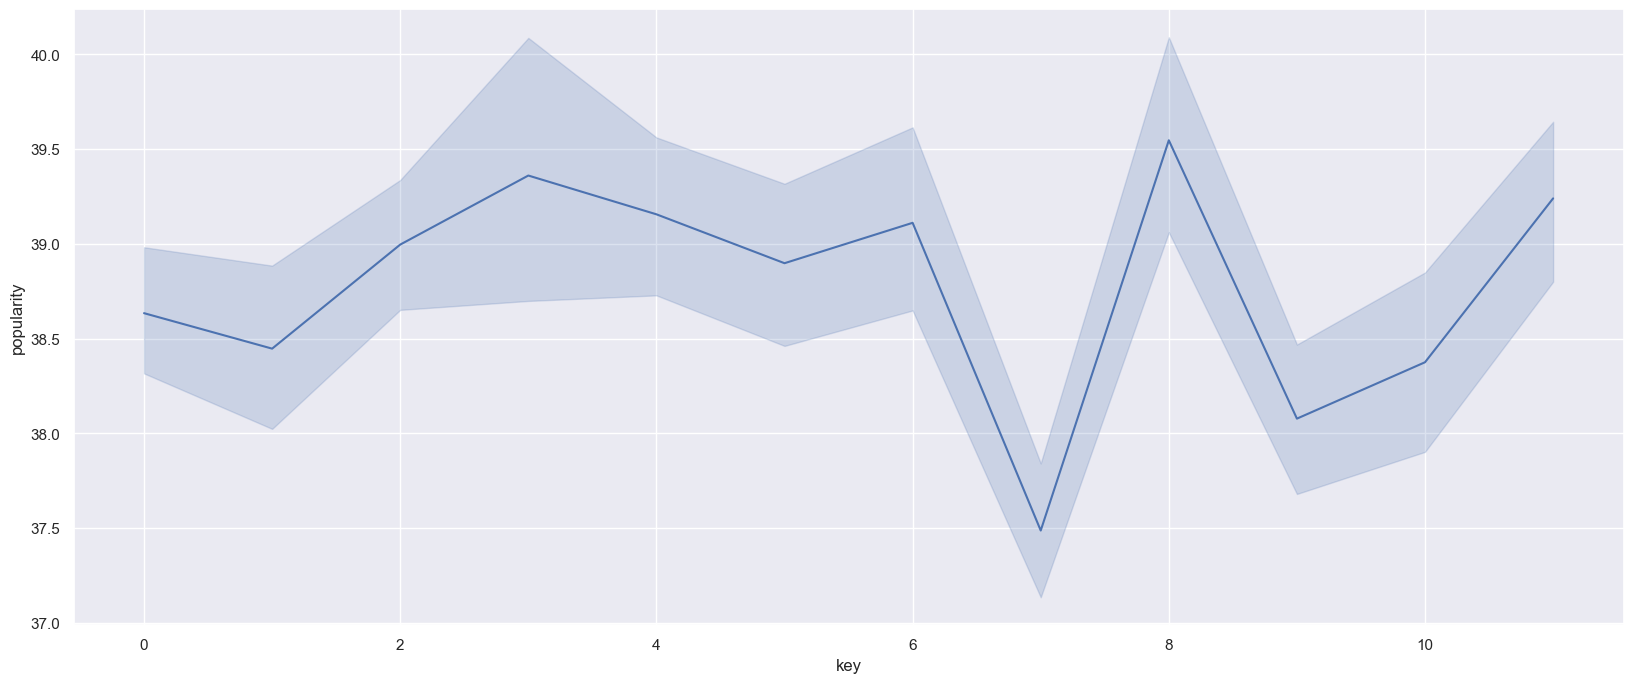

In [78]:
sns.lineplot(data1, x='key', y='popularity')

<Axes: xlabel='loudness', ylabel='popularity'>

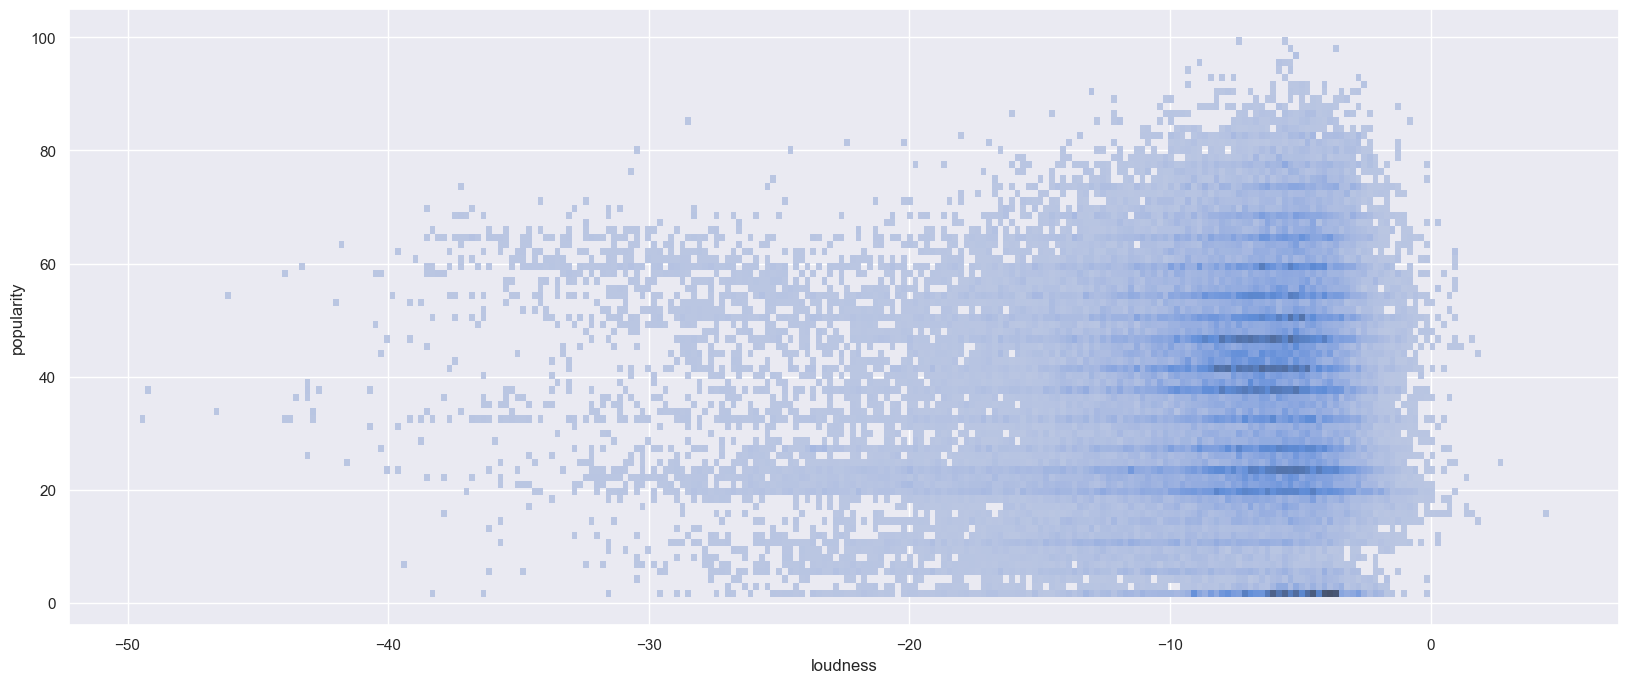

In [79]:
sns.histplot(data1, x='loudness', y='popularity')

<Axes: xlabel='mode', ylabel='popularity'>

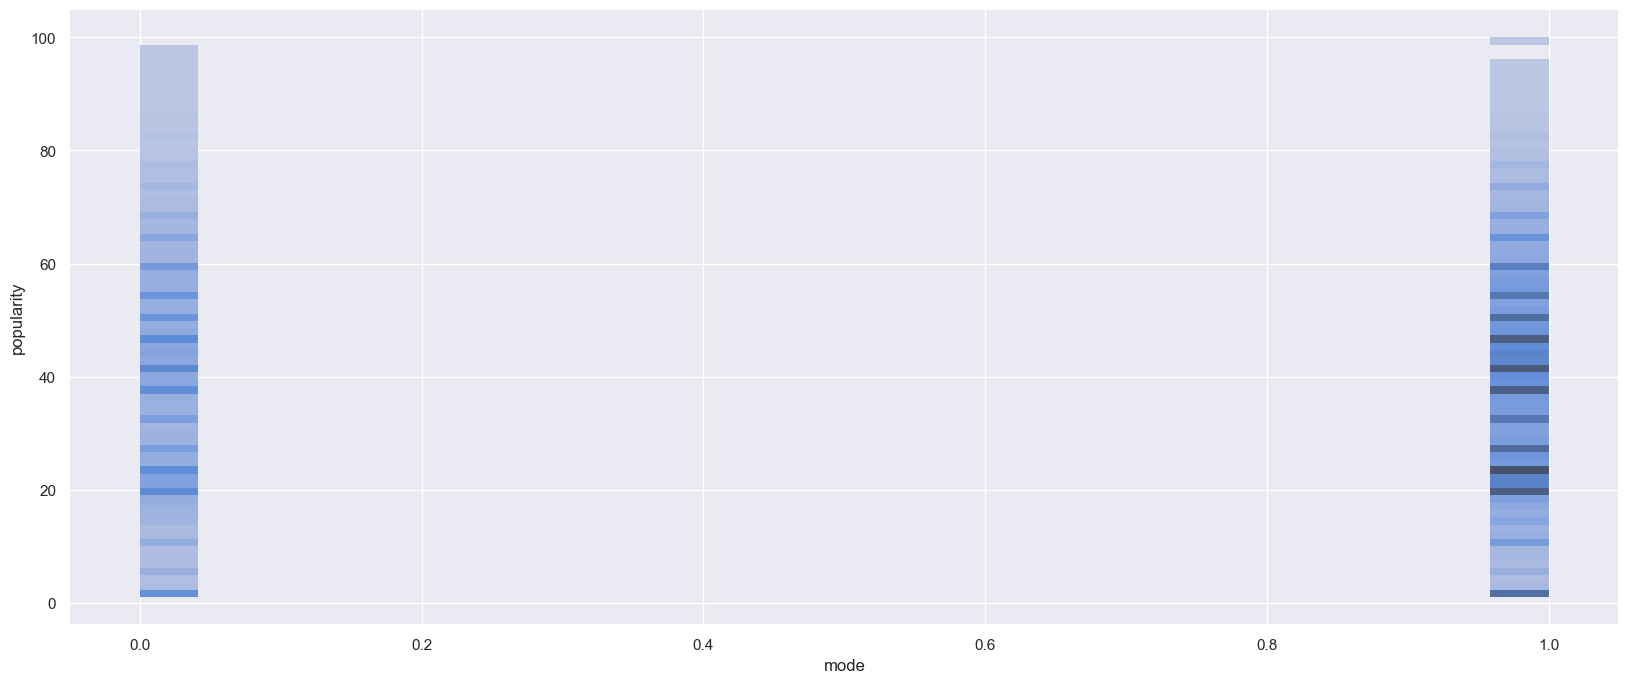

In [80]:
sns.histplot(data1, x='mode', y='popularity')

<Axes: xlabel='speechiness', ylabel='popularity'>

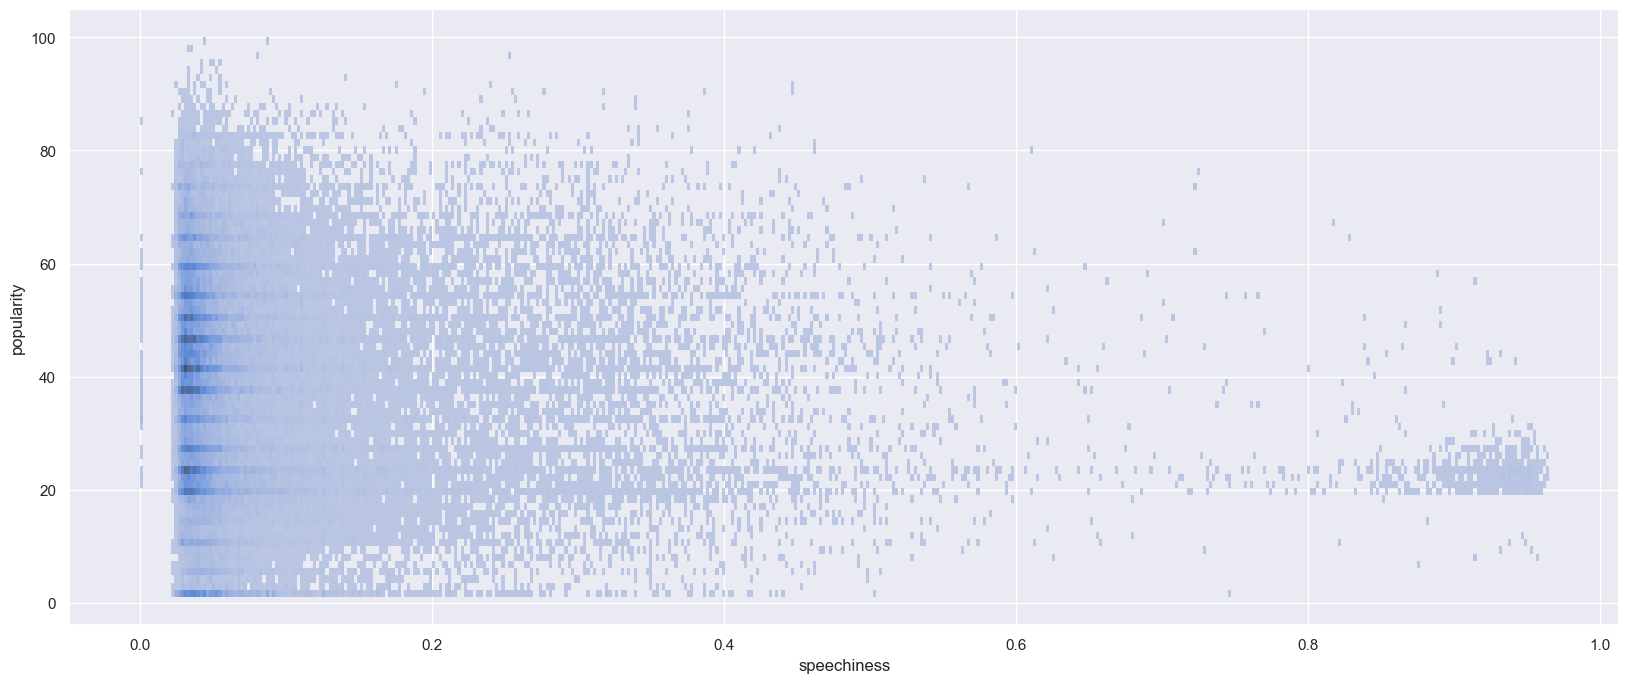

In [81]:
sns.histplot(data1, x='speechiness', y='popularity')

<Axes: xlabel='instrumentalness', ylabel='popularity'>

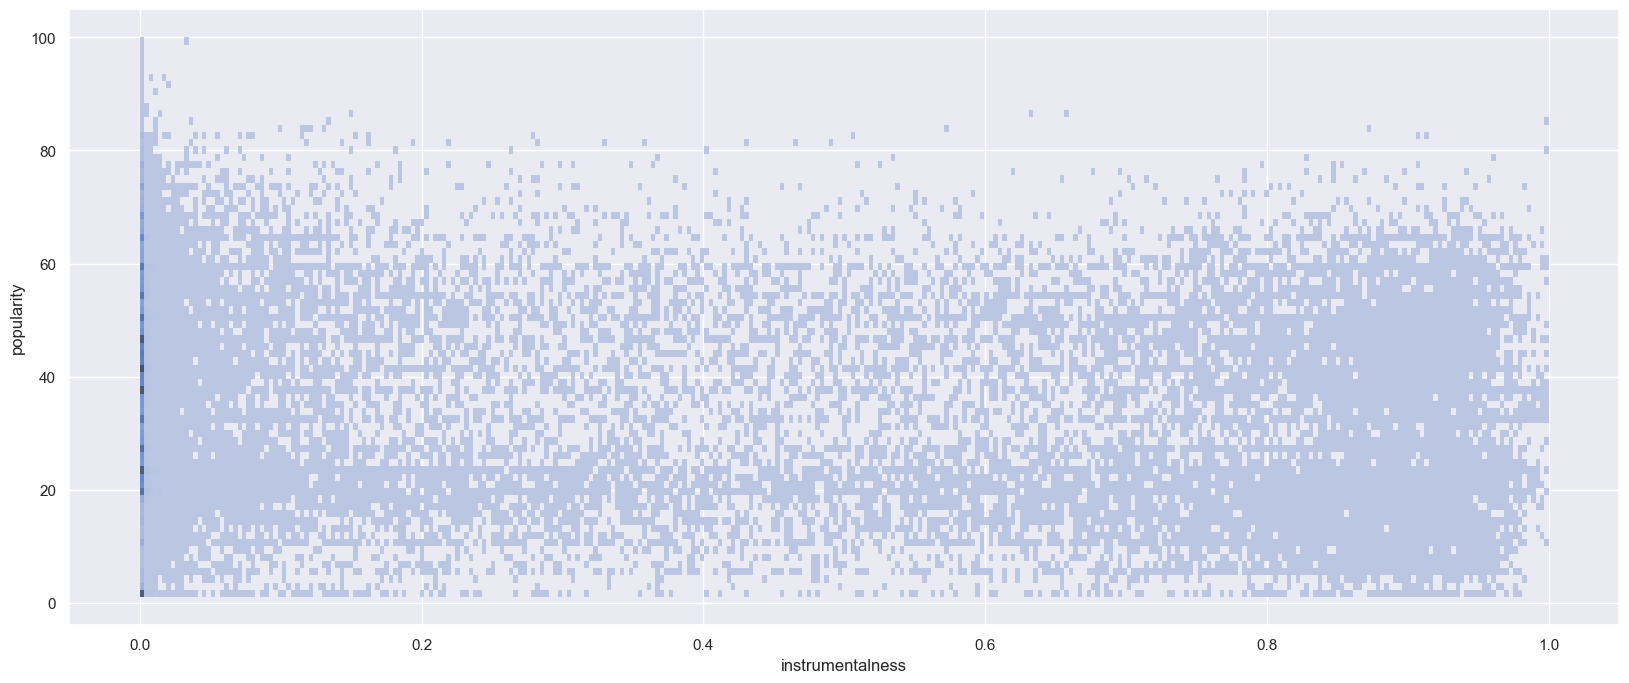

In [82]:
sns.histplot(data1, x='instrumentalness', y='popularity')

<Axes: xlabel='liveness', ylabel='popularity'>

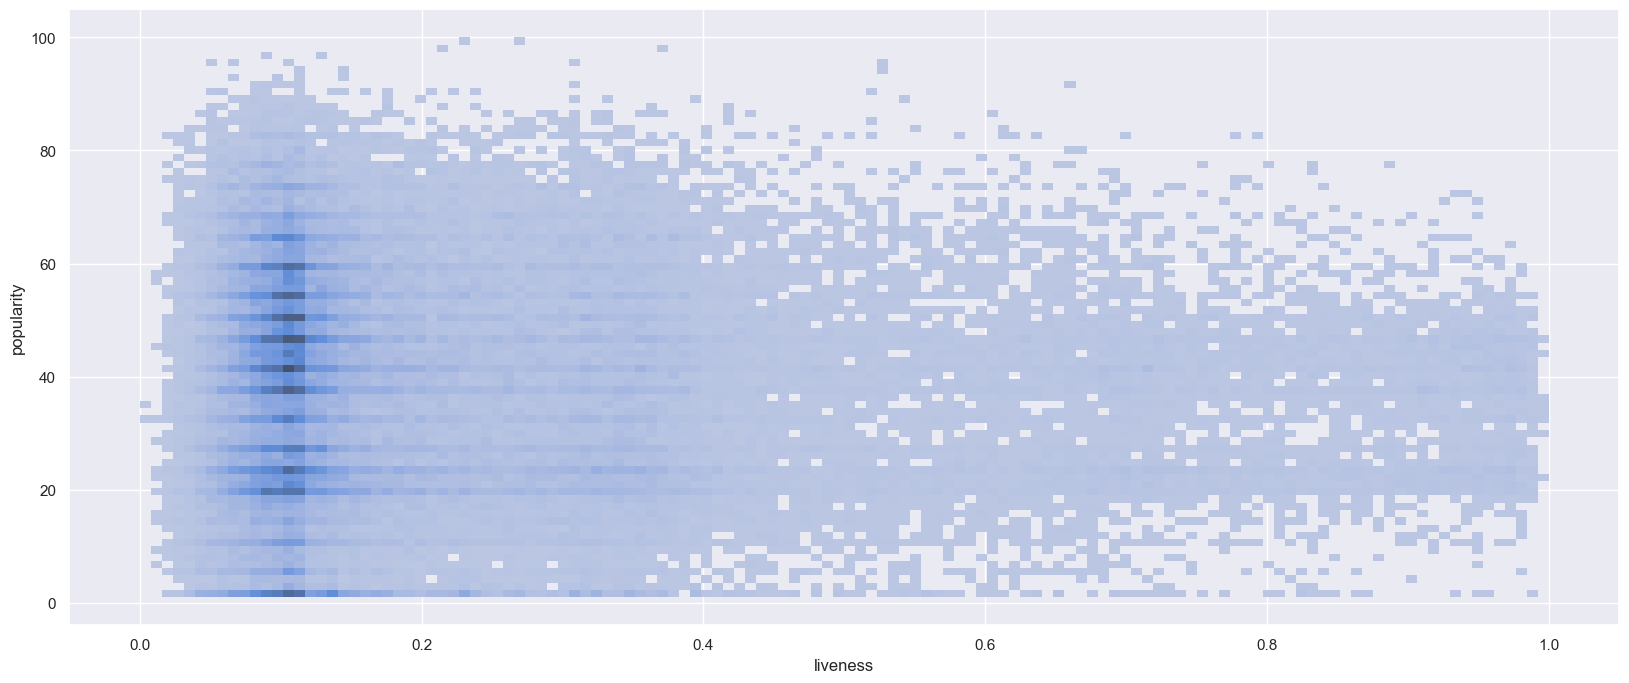

In [83]:
sns.histplot(data1, x='liveness', y='popularity')

<Axes: xlabel='valence', ylabel='popularity'>

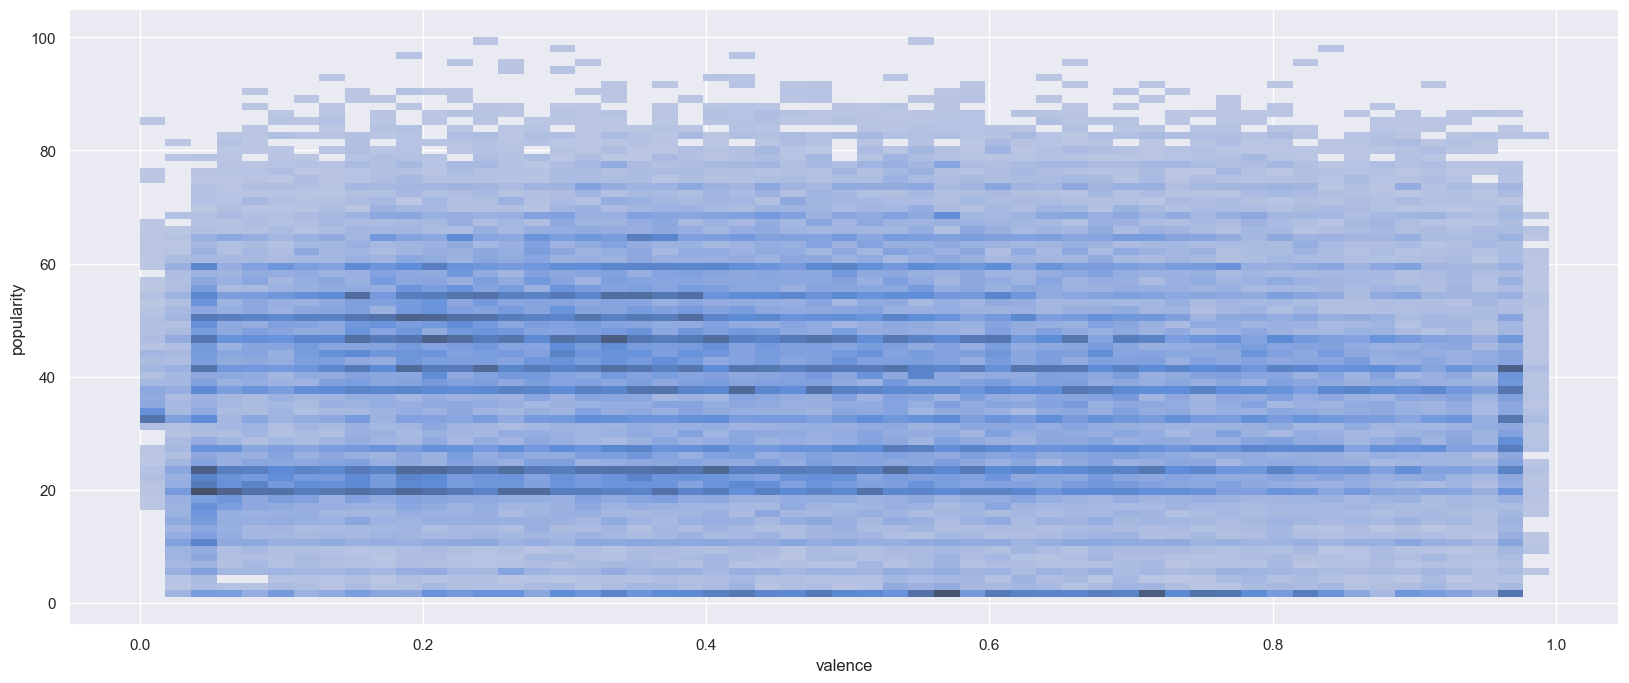

In [84]:
sns.histplot(data1, x='valence', y='popularity')

<Axes: xlabel='tempo', ylabel='popularity'>

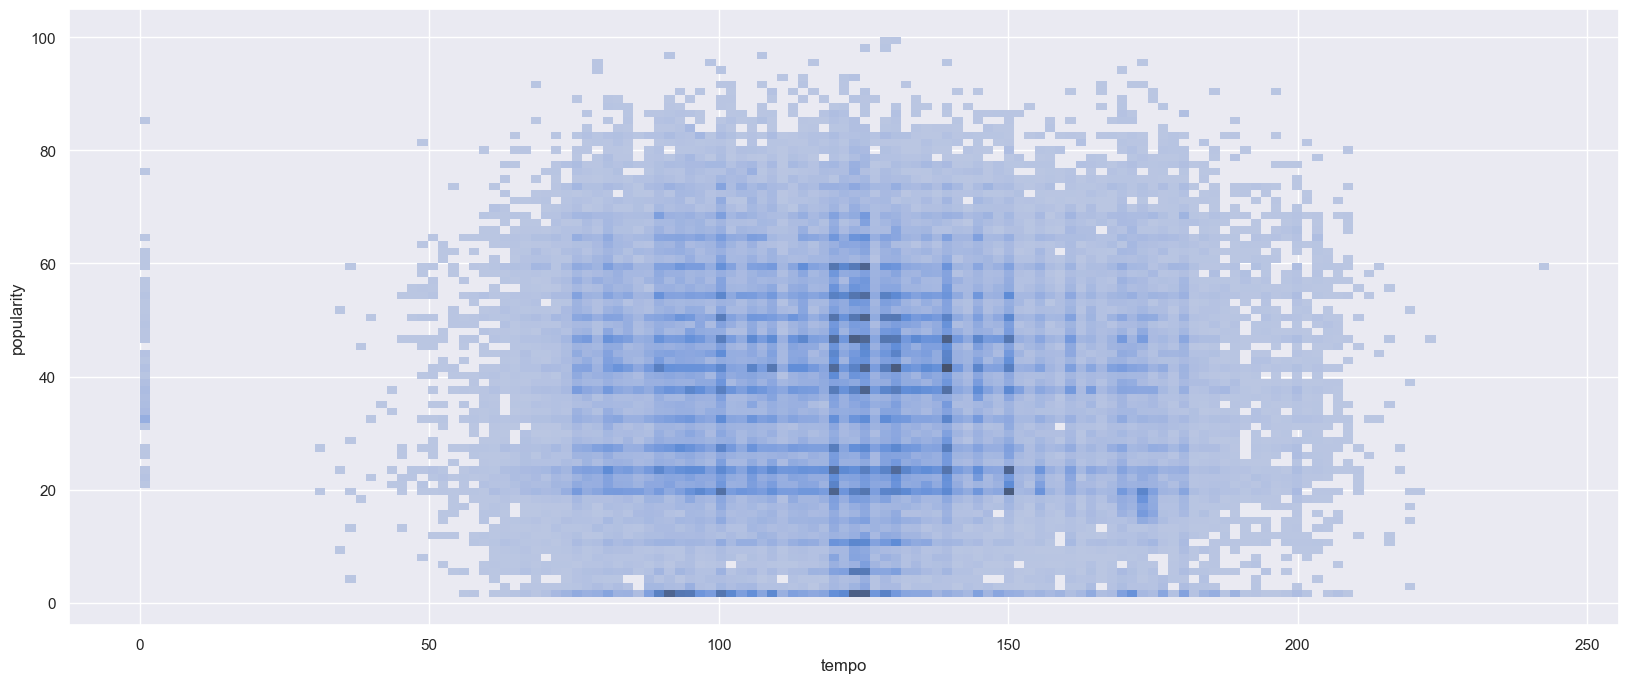

In [85]:
sns.histplot(data1, x='tempo', y='popularity')

<Axes: xlabel='time_signature', ylabel='popularity'>

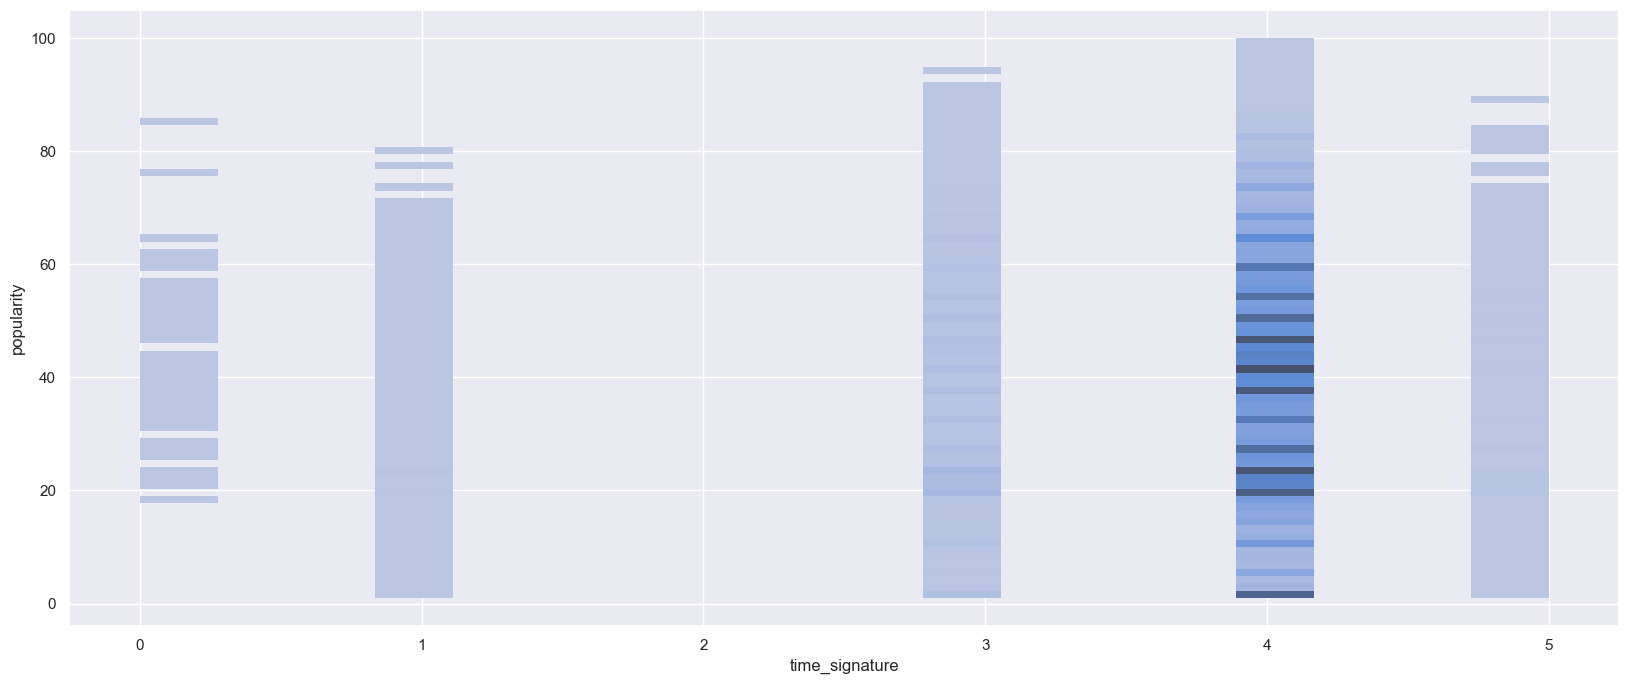

In [86]:
sns.histplot(data1, x='time_signature', y='popularity')

In [87]:
data_2 = data.iloc[:, 3:18] #оставили только числовые значения

<Axes: >

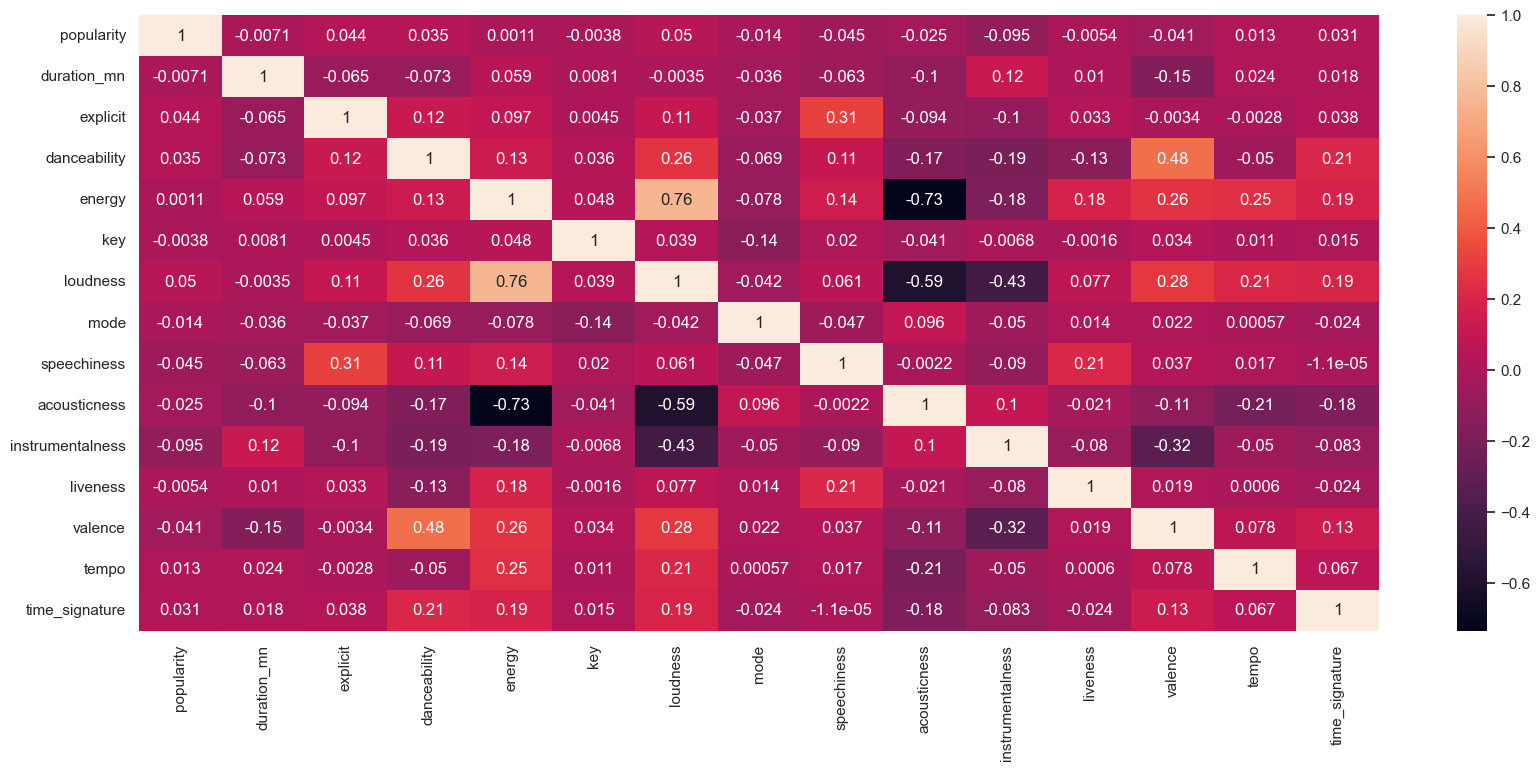

In [88]:
sns.heatmap(data_2.corr(), annot=True)

Вывод:

1) Наиболее популярные треки от 2 до 4 минут.

2) Откровенные пенси немного популярнее неоткровенных

4) Более энергичные треки незначительно популярнее менее энергичных

5) Наименее популярны треки, у которых значение ключа равно 7

6) Треки с нормальной громкостью более популярны, громкость находится пределах от -10 до -3

7) Треки со значением мажор немного популярнее чем те, у которых минор

8) Треки со значением speacheness равным от 0,025 до 0,05 более популярны

9) Инструментальность практически не влияет на популярность

10) Треки со значением liveness равным от 0,05 до 0,15 более популярны

11) Критерий valence практически не влияет на популярность

12) Критерий tempo практически не влияет на популярность

13) Треки со значением time_signature равным 4 немного популярнее других


Из тепловой карты видна корреляция между акустичностью и энергичностью, акустичностью и громкостью, инструментальностью и громкостью, между танцевальностью и настроеннием (valence), громкостью и энергичностью.
Корреляция остальных показателей с популярностью минимальна

<Axes: xlabel='track_genre', ylabel='popularity'>

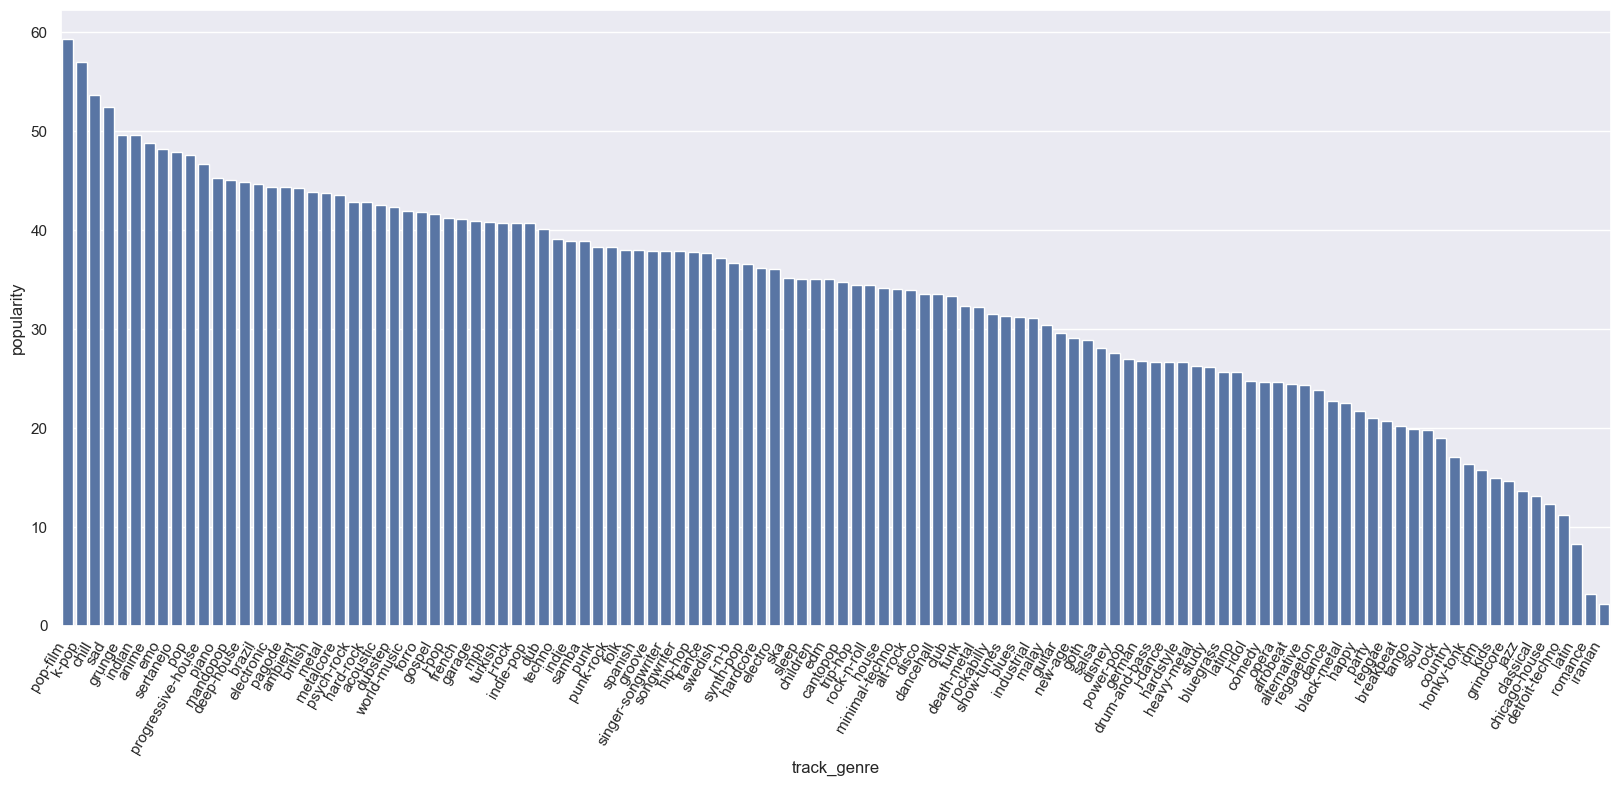

In [89]:
#Группировка по жанрам, вычисляем среднюю популярность для каждого жанра
genres = data.groupby('track_genre')['popularity'].mean().reset_index()
#Сортировка по популярности
genres = genres.sort_values(by='popularity', ascending=False)
plt.xticks(rotation=60, ha='right') #поворачиваем названия жанров для лучшей читабельности
sns.barplot(genres, x='track_genre', y='popularity')


Из диаграммы видно, что наиболее популярный жанр это поп-фильм

Feature Engineering.

Разобъём на численные и категоральные признаки

In [90]:
data.head()

,artists,album_name,track_name,popularity,duration_mn,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,3.844433,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,2.493500,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,3.513767,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,3.365550,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,3.314217,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [91]:
#Получаем список категоральных столбцов из DataFrame
cols_cat = data.select_dtypes(include=['object', 'category']).columns.to_list()

#Получаем список числовых столбцов из DataFrame
cols_num = data.select_dtypes(include=['number']).columns.to_list()

#Получаем количество уникальных значений для каждого числового столбца
cols_num_nunique = data[cols_num].nunique()
#Получаем количество уникальных значений для каждого категорального столбца
cols_cat_nunique = data[cols_cat].nunique()

cols_all_nunique = pd.concat([cols_cat_nunique, cols_num_nunique])
cols_all_nunique


artists             31437
album_name          46589
track_name          73608
track_genre           114
popularity            101
duration_mn         50696
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45652
time_signature          5
dtype: int64

Проверим на отклонение числовые признаки

In [92]:
data[cols_num].skew().sort_values()

time_signature      -4.098296
loudness            -2.006541
energy              -0.597005
mode                -0.572326
danceability        -0.399505
key                 -0.008489
popularity           0.046393
valence              0.115097
tempo                0.232308
acousticness         0.727321
instrumentalness     1.734392
liveness             2.105728
explicit             2.964714
speechiness          4.647493
duration_mn         11.195826
dtype: float64

Видно, что некоторые признаки скошены влево, а некоторые вправо, значит, применим нормализацию данных. Сделаю это при создании модели.

Удаляем ненужные признаки, которые плохо коррелируют с популярностью

In [93]:
data = data.drop(['track_name','artists', 'album_name'], axis=1)

#создаём новый столбец как отношение танцевальности к энергичности
data['dance_energy_rat'] = data['danceability'] / (data['energy'] + 1e-6)

data.head()

,popularity,duration_mn,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,dance_energy_rat
0,73,3.844433,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1.466374
1,55,2.493500,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.530105
2,57,3.513767,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1.220052
3,71,3.365550,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,4.463012
4,82,3.314217,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1.395031


Применим one-hot-encoding для категоральных признаков

In [94]:
#У 'mode' всего два уникальных значения, у 'time_signature' их 5, поэтому можно применить one-hot-encoding
data = pd.get_dummies(data, columns=['mode', 'time_signature'], drop_first=True)

#Target Encoding
data['category_track_genre'] = data.groupby('track_genre')['popularity'].transform('mean')

Создаём признаки и таргет

In [95]:
#Получаем список всех столбцов из датафрейма
features = data.columns.to_list()

#Столбец "popularity" это целевая переменная, поэтому удалеям его из списка признаков
features.remove('popularity')
features.remove('track_genre')

#Определяем целевую переменную
target = 'popularity'

Создаём модель без и с кросс-валидацией

Эксперименты с моделями машинного обучения

In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor


Линейная регрессия без кросс-валидации

In [97]:
#Выбор признаков и целевой переменно

x = data[features] #Признаки
y = data[target] #Целевая переменная

#Разделение данных на обучающую и тестовую выборки в соотношении 80% и 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Создание экземпляра StandartScaler для нормализации признаков
scaler = StandardScaler()

#Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

#Применение нормализации к тестовой выборке на основе параметров обучающей выборки
X_test_scaled = scaler.transform(X_test)

#Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#Предсказание целевой переменной на тестовой выборке
y_pred = model.predict(X_test_scaled)

#Оценка модели с использованием различных метрик
mse = mean_squared_error(y_test, y_pred) #Среднеквадратичная
mae = mean_absolute_error(y_test, y_pred) #Средняя абсолютная
rmse = np.sqrt(mse) #Корень из среднеквадратичной

print(f'MSE: {mse}\nMAE: {mae}\nRMSE: {rmse}')

MSE: 365.8755795719953
MAE: 14.082732872428442
RMSE: 19.127874413326623


Линейная  регрессия с кросс-валидацией

In [98]:
#Создание модели линейной регрессии
model = LinearRegression()

#Разделение данных на обучающую и тестовую выборки в соотношении 80% и 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Кросс-валидация с 5 фолдами для оценки метрик (MSE, MAE, RMSE)
cv_mse = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mae = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print('Результаты кросс-валидации (5 фолдов):')
print(f'MSE: {np.mean(cv_mse):.4f} +- {np.std(cv_mse):.4f}')
print(f'MAE: {np.mean(cv_mae):.4f} +- {np.std(cv_mae):.4f}')
print(f'R^2 Score: {np.mean(cv_rmse):.4f} +- {np.std(cv_rmse):.4f}') #Коэффициент детерминации


Результаты кросс-валидации (5 фолдов):
MSE: 369.5141 +- 3.3908
MAE: 14.1087 +- 0.0928
R^2 Score: 0.2577 +- 0.0038


График сравнения

<Axes: >

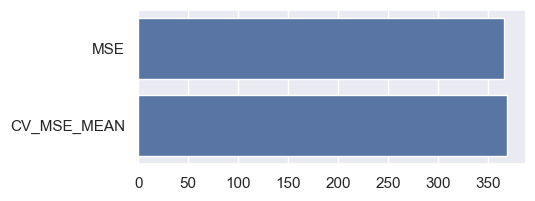

In [99]:
#Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)
cv_r2_mean = np.mean(cv_rmse)

#Подготовка данных для графиков
metrics_MSE = {'MSE': mse, 'CV_MSE_MEAN': cv_mse_mean}
metrics_R2 = {'R2': rmse, 'CV_R2': cv_r2_mean} 

sns.set(rc={"figure.figsize": (5, 2)})
sns.barplot(metrics_MSE, width=0.8, orient='y')

<Axes: >

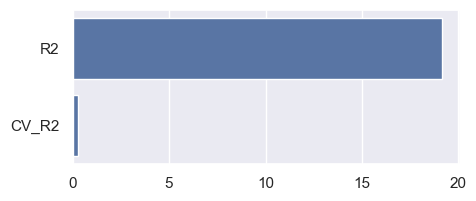

In [100]:
sns.barplot(metrics_R2, orient='y')

Дерево без кросс-валидации

In [101]:
#Разделение данных на обучающую и тестовую выборки в соотношении 80% и 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Нормализация признаков
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) #обучение и преобразование обучающей выборки
X_test_scaled = scaler.transform(X_test) #преобразование тестовой выборки

#Задаём параметры дерева решений
tree_model = DecisionTreeRegressor(
    max_depth=10, #максимальная глубина дерева
    min_samples_split=5, #минимаьное количество образцов для разделения узла
    min_samples_leaf=2, #минимальное количество образцов в листьях
    random_state=42
)

#Обучение модели
tree_model.fit(X_train_scaled, y_train)

#Предсказание целевой переменной на тестовой выборке
y_pred = tree_model.predict(X_test_scaled)

#Оценка модели на тестовой выборке
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Результаты оценки модели:')
print(f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR^2 Score: {r2:.4f}')

Результаты оценки модели:
MSE: 355.6448
MAE: 13.5354
R^2 Score: 0.2831


In [102]:
#Получение важности каждого признака из обученного дерева решений
feature_importances = tree_model.feature_importances_
feature_names = X_train.columns

#Сортировка признаков по важности в порядке убывания
sorted_index = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_index]
sorted_feature_names = feature_names[sorted_index]

#Выбор 25 наиболее важных признаков
top_25_feature_importances = sorted_feature_importances[:25]
top_25_feature_names = sorted_feature_names[:25]

<Axes: >

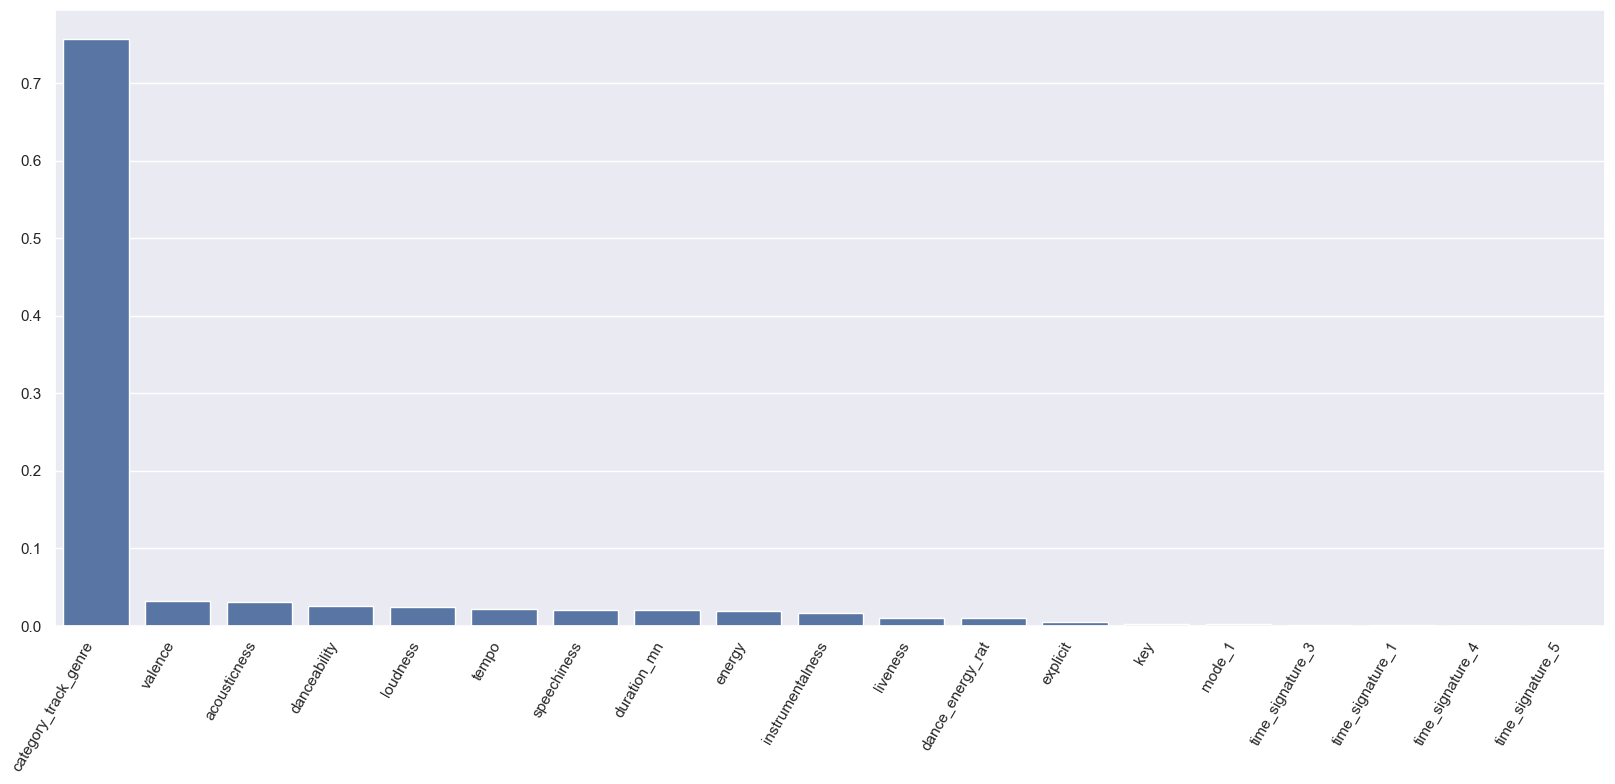

In [103]:
#График зависимости популярности от признаков
sns.set(rc={"figure.figsize": (20, 8)})
plt.xticks(rotation=60, ha='right')
sns.barplot(dict(zip(top_25_feature_names, top_25_feature_importances)))

Дерево с кросс-валидацией

In [104]:
#Разделение данных на обучающую и тестовую выборки в соотношении 80% и 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Задаём диапазоны гиперпараметров для дерева решений
param_grid = {
    'max_depth':[5, 10, 15, None], #максимальная глубина дерева
    'min_samples_split': [2, 5, 10], #минимальное количество образцов для разделения узла
    'min_samples_leaf': [1, 2, 4] #минимальное количество образцов в листе
}

#Создание модели дерева решений
tree_model = DecisionTreeRegressor(random_state=42)

#Настройка GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(estimator=tree_model,
                           param_grid=param_grid,
                           cv=5, #5 фолдов для перекрёстной валидации
                           scoring='neg_mean_squared_error', #используем mse как метрику
                           n_jobs=-1, #используем все доступные ядра процессора
                           verbose=1) #выводим процесс выполнения (дя отладки)

#Обучение GridSearcCV на обучающей выборке
grid_search.fit(X_train_scaled, y_train)

#Лучшие параметры, найденные с помощью GridSearchCV
print("Лучшие параметры:", grid_search.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [105]:
#Лучшая модель после оптимизации
best_tree_model = grid_search.best_estimator_

#Оценка модели с кросс-валидацией
cv_mse = -cross_val_score(best_tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mae = -cross_val_score(best_tree_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(best_tree_model, X_train_scaled, y_train, cv=5, scoring='r2')

#Вывод результатов кросс-валидации с оптимизированной моделью
print('Результаты кросс-валидации после оптимизации 5 фолдов:')
print(f'MSE: {np.mean(cv_mse):.4f} +- {np.std(cv_mse):.4f}')
print(f'MAE: {np.mean(cv_mae):.4f} +- {np.std(cv_mae):.4f}')
print(f'R^2 Score: {np.mean(cv_r2):.4f} +- {np.std(cv_r2):.4f}')


Результаты кросс-валидации после оптимизации 5 фолдов:
MSE: 360.4989 +- 4.2271
MAE: 13.6051 +- 0.0817
R^2 Score: 0.2759 +- 0.0049


График сравнения

<Axes: >

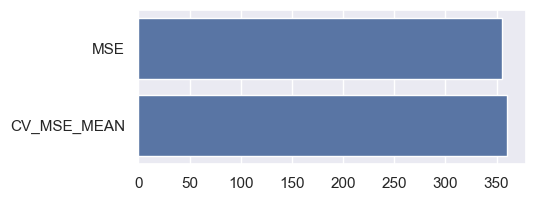

In [106]:
#Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)
cv_r2_mean = np.mean(cv_r2)

#Данные для графиков
metrics_MSE = {'MSE': mse, 'CV_MSE_MEAN': cv_mse_mean}
metrics_R2 = {'R2': r2, 'CV_R2': cv_r2_mean}

sns.set(rc={"figure.figsize": (5, 2)})
sns.barplot(metrics_MSE, width=0.8, orient='y')

<Axes: >

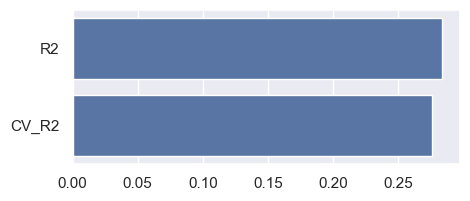

In [107]:
sns.barplot(metrics_R2, width=0.8, orient='y')

Градиентный бусттинг без кросс валидации

In [112]:
#Разделение данных на обучающую и тестовую выборки в соотношении 80% и 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Нормализация признаков (используем необработанные данные)
X_train_scaled = X_train
X_test_scaled = X_test

#Создание и обучение модели градиентного бустинга
model = GradientBoostingRegressor(
    n_estimators=60, #количество деревьев в ансамбле
    learning_rate=0.1, #темп обучения
    max_depth=3, #максимальная глубина деревьев
    random_state=42) #установление случайного состояния для воспроизводимости

model.fit(X_train_scaled, y_train)

#Предсказание целевой переменной на тестовой выборке
y_pred = model.predict(X_test_scaled)

#Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Результаты оценки модели:')
print(f'MSE: {mse:.4f}\nMAE: {mae:.4f}\nR^2 Score: {r2:.4f}')

Результаты оценки модели:
MSE: 358.9201
MAE: 14.0034
R^2 Score: 0.2765


In [113]:
#Получаем важность признаков из обученной модели градиентного бустинга
feature_importances = model.feature_importances_
feature_names = X_train.columns

#Сортируем признаки по важности в порядке убывания
sorted_index = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_index]
sorted_feature_names = feature_names[sorted_index]

#Выбираем 25 самых значимых признаков
top_25_feature_importances = sorted_feature_importances[:25]
top_25_feature_names = sorted_feature_names[:25]

<Axes: >

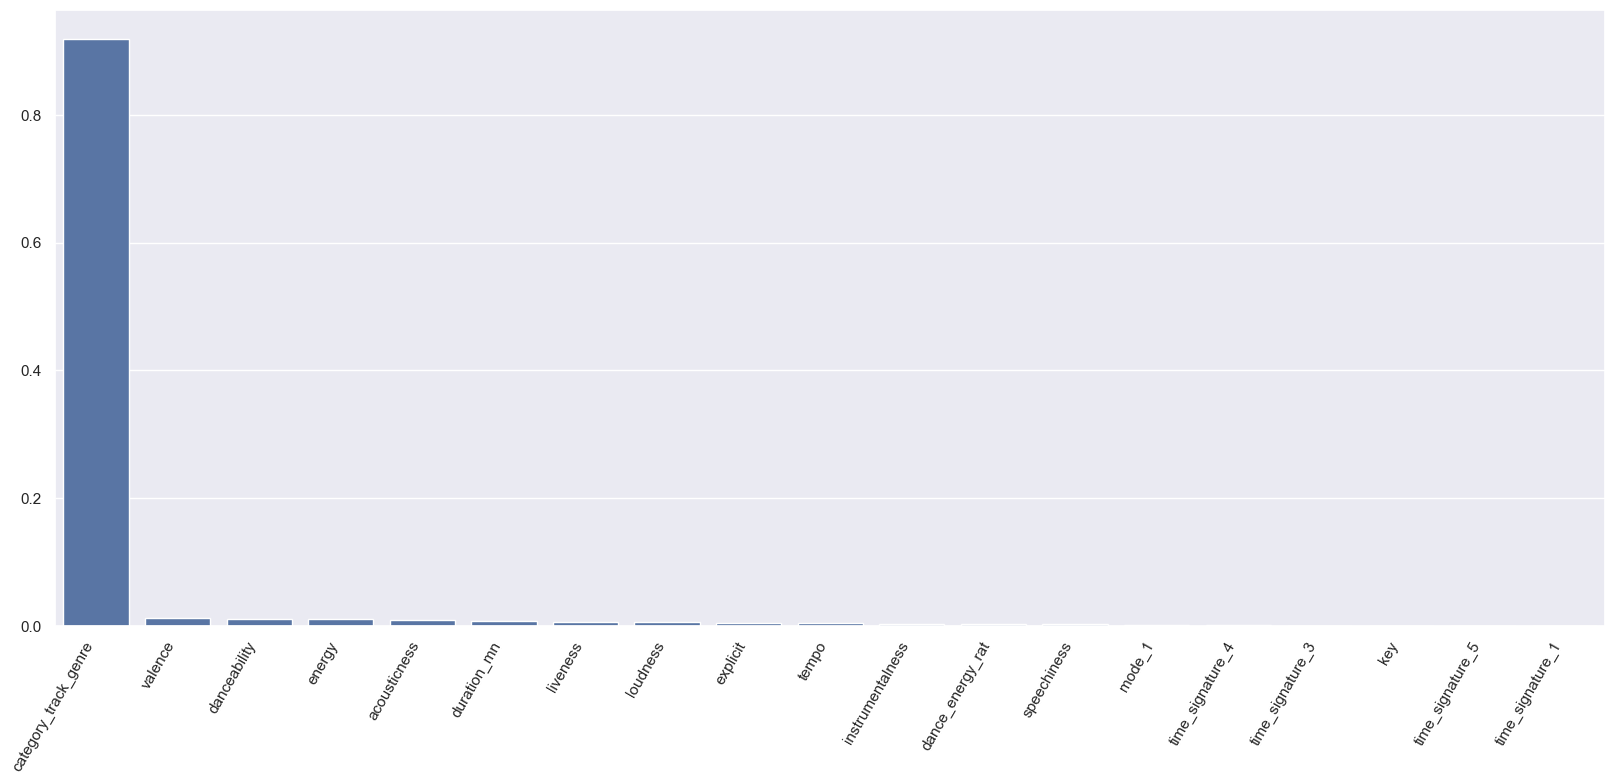

In [114]:
#График зависимости популярности от признаков
sns.set(rc={"figure.figsize": (20, 8)})
plt.xticks(rotation=60, ha='right')
sns.barplot(dict(zip(top_25_feature_names, top_25_feature_importances)))

Градиентный бустинг с кросс-валидацией

In [115]:
#Разделение данных на обучающую и тестовую выборки в соотношении 80% и 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Создание экземпляра StandertScaler для нормализации признаков
scaler = StandardScaler()

#Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

#Применение нормализации к тестовой выборке
X_test_scaled = scaler.transform(X_test)

#Создание модели градиентного бустинга
model = GradientBoostingRegressor(
    n_estimators=60, #Количество деревьев в ансамбле
    learning_rate=0.1, #Темп обучения
    max_depth=3, #Максимальная глубина деревьев
    random_state=42 #Установление случайного состояния для воспроизводимости
)

#Кросс-валидация с 5 фолдами для оценки метрик
cv_mse = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mae = -cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

print("Результаты кросс-ваидации 5 фолдов:")
print(f'MSE: {np.mean(cv_mse):.4f} +- {np.std(cv_mse):.4f}')
print(f'MAE: {np.mean(cv_mae):.4f} +- {np.std(cv_mae):.4f}')
print(f'R^2 Score: {np.mean(cv_r2):.4f} +- {np.std(cv_r2):.4f}')

Результаты кросс-ваидации 5 фолдов:
MSE: 362.7521 +- 3.1184
MAE: 14.0363 +- 0.0861
R^2 Score: 0.2713 +- 0.0033


In [118]:
model.fit(X_train_scaled, y_train)

#Предсказание целевой переменной на тестовой выборке
#y_pred = (X_train_scaled, y_train)

#Получаем важность из обучения модели градиентного бустинга
feature_importances = model.feature_importances_
feature_names = X_train.columns

#Сортируем признаки по важности в порядке убывания
sorted_index = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_index]
sorted_feature_names = feature_names[sorted_index]

#Выбор 25 наиболее важных признаков
top_25_feature_importances = sorted_feature_importances[:25]
top_25_feature_names = sorted_feature_names[:25]

Графики сравнения MSE и R^2 Score градиентного бустинга с кросс-валидацией и без неё

<Axes: >

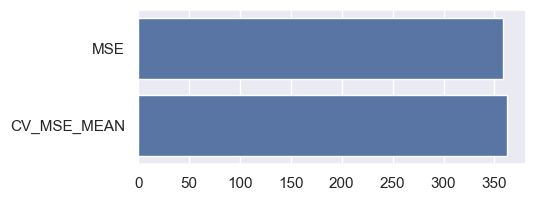

In [124]:
#Средние значения метрик для кросс-валидации
cv_mse_mean = np.mean(cv_mse)
cv_r2_mean = np.mean(cv_r2)

#Данные для графиков
metrics_MSE = {'MSE': mse, 'CV_MSE_MEAN': cv_mse_mean}
metrics_R2 = {'R2': r2, 'CV_R2_MEAN': cv_r2_mean}

sns.set(rc={"figure.figsize": (5, 2)})
sns.barplot(metrics_MSE, width=0.8, orient='y')

<Axes: >

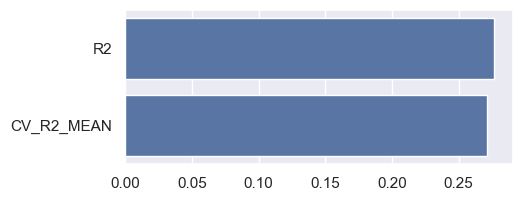

In [125]:
sns.barplot(metrics_R2, width=0.8, orient='y')

Нейронная сеть без кросс-валидации

In [126]:
#Разделение данных на обучающую и тестовую выборки в соотношении 80% и 20%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Создание экземпляра StandartScaler для нормализации признаков
scaler = StandardScaler()

#Нормализация признаков: вычисляется среднее и стандартное отклонение на обучающей выборке
X_train_scaled = scaler.fit_transform(X_train)

#Применение нормализации к тестовой выборке
X_test_scaled = scaler.transform(X_test)

#Сoздание модели MLRegressor
reg = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25), #Оптимизированная структура с 3 скрытыми слоями
    max_iter=1000, #увеличение числа операций для обучения
    random_state=42, #фиксация случайного числа для воспроизводимости
    solver='adam', #использование алгоритма Adam для оптимизации
    learning_rate_init=0.001, #начальный шаг обучения
    tol=1e-4
)

#Обучение модели
reg.fit(X_train_scaled, y_train)

#Предсказываение целевой переменной 
y_pred = reg.predict(X_test_scaled)

#Оценка модели с использованием различных метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Оценка модели:")
print(f'MSE: {mse}\nMAE: {mae}\nR^2 Score: {r2}')

Оценка модели:
MSE: 333.86574360925204
MAE: 13.528346836491764
R^2 Score: 0.3270049830744066


Нейронная сеть с кросс-валидацией

In [128]:
#Нормализация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

#Созданием модели MLRegressor
reg = MLPRegressor(
    hidden_layer_sizes=(50, 25), #оптимизированная архитектура с двумя склытыми слоями
    max_iter=500, #уменьшение максимального числа итераций для обучения
    random_state=42, #фиксация случайного состояния для обеспеения воспроизводимости
    solver='adam', #использование алгоритма Adam для оптимизации
    learning_rate_init=0.001, #начальный шаг обучения
    tol=1e-4 #критерий остановки
)

#Метрики для оценки
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False), 
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': make_scorer(r2_score)
}

#Кросс-валидация
cv_results = {
    metric: cross_val_score(reg, X_scaled, y, cv=5, scoring=scorer, n_jobs=-1) #параллельное выполнение кросс-валидации
    for metric, scorer in scoring.items()
}

cv_results['mse'] = -cv_results['mse']
cv_results['mae'] = -cv_results['mae']

print('Результаты кросс-валидации 5 фолдов')
print(f'MSE: {np.mean(cv_results['mse']):.4f} +- {np.std(cv_results['mse']):.4f}')
print(f'MAE: {np.mean(cv_results['mae']):.4f} +- {np.std(cv_results['mae']):.4f}')
print(f'R^2 Score: {np.mean(cv_results['r2']):.4f} +- {np.std(cv_results['r2']):.4f}')

Результаты кросс-валидации 5 фолдов
MSE: 378.8083 +- 28.5401
MAE: 14.6144 +- 0.5494
R^2 Score: 0.2230 +- 0.0440


График сравнения

<Axes: >

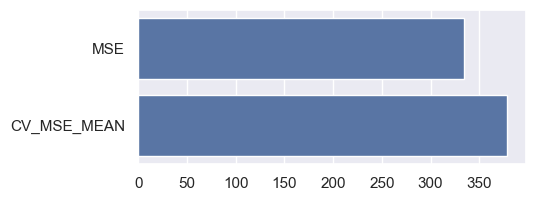

In [130]:
#Данные для графиков
metrics_MSE = {'MSE': mse, 'CV_MSE_MEAN': np.mean(cv_results['mse'])}
metrics_R2 = {'R2': r2, 'CV_R2_MEAN': np.mean(cv_results['r2'])}

sns.set(rc={"figure.figsize": (5, 2)})
sns.barplot(metrics_MSE, width=0.8, orient='y')

<Axes: >

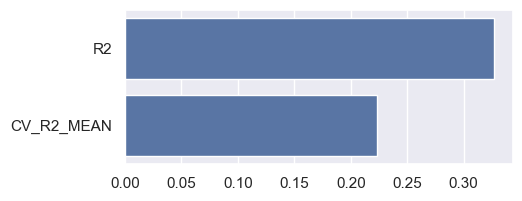

In [131]:
sns.barplot(metrics_R2, width=0.8, orient='y')

Вывод

Дерево решений продемонстрировало наилучший score 0.2759 со стандартным отклонением +-0.0049. Несмотря на то, что его производительность уступает линейной модели, дерево решений может быть полезным в определённых ситуациях, особенно когда данные имеют сложные и нестандартные зависимости. 

Градиентный бустинг показал чуть менее низкий score 0.2713 (+-0.0033). Хотя его производительность немного превышает производительность дерева решений, она существенно ниже, чем у линейной модели. Тем не менее, данный метод имеет потенциал для улучшения за счет настройки гиперпараметров и увеличения числа базовых моделей. 

Линейная регрессия продемонстрировала результат с score = 0.2577 и высокой степенью стабильности, что подтверждается невысоким стандартным отклонением (0.0038). Это свидетельствует о том, что линейная модель обеспечивает достойное качество предсказаний на заданном наборе данных. 

Нейронные сети, в свою очередь, демонстрируют наименьший score 0.2230 (+-0.0440).